### Section 1

#### Q1: Please provide a general description and justification for your project. *

P2P lending:
Given the advantages of P2P lending over traditional banks, the market for P2P lending is expected to grow rapidly along with the improvement of the internal system of P2P lending platforms, external regulation, and more participation from borrowers and lenders. The data is a pool of both defaulted and non-defaulted loans from a leading European P2P lending platform, Bondora (https://www.bondora.com/en) from the time period between 1st March 2009 and 27th January 2020. The data comprises demographic and financial information of borrowers and loan transactions. In P2P lending, loans are typically uncollateralized and lenders seek higher returns as compensation for the financial risk they take. Here the attempt is to explore the dataset and try to find out some patterns behind borrowers' properties, rating types, and how they link to default loan or completed loan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('bondora/LoanData.csv') 

In [11]:
data.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentPosition,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,PlannedInterestTillDate,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,ModelVersion,EL_V0,EL_V1,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,1.560080e+05,156008.000000,156008.000000,156008.000000,156008.000000,156008.000000,155963.000000,156008.000000,156008.000000,0.0,155963.000000,156008.000000,156008.000000,156008.000000,156008.000000,149323.000000,0.0,0.0,156008.000000,155963.000000,155963.000000,155811.000000,0.0,155922.000000,154356.000000,156008.000000,156008.000000,156008.000000,156008.000000,156008.000000,156008.000000,156008.000000,1.560080e+05,156008.000000,1.560080e+05,156008.000000,155963.000000,155963.000000,156008.000000,54459.000000,154431.000000,68128.000000,73724.000000,153372.000000,153372.000000,153372.000000,153372.000000,141171.000000,62055.000000,62055.000000,62055.000000,62055.000000,62055.000000,62055.000000,101311.000000,153372.000000,4569.000000,12922.000000,87935.000000,156008.000000,156008.000000,67805.000000,67805.000000,156008.000000,156008.000000,156008.000000,156008.000000,104052.000000,58429.000000,156008.000000,101593.000000,101593.000000,67805.000000,67805.000000
mean,1.091910e+06,899.540972,31.399108,562.626974,13.349001,3.909312,2.923995,2.750045,40.675017,NaN,0.465405,2702.684911,2523.856968,35.816437,46.692029,116.247308,NaN,NaN,0.158120,3.646384,-0.231850,-0.005327,NaN,1.053617,3.348791,376.957991,16.213965,4.900440,2.060952,2.805337,2.034338,37.177102,1.721427e+03,3.059580,5.234402e+02,0.161524,6.699085,105.404524,11.095130,994.558014,896.543325,674.344660,681.952770,0.144257,0.364405,0.135358,0.245804,306.638445,902.728728,1210.183530,2410.058216,1944.204794,345.120119,10.659852,1.497527,4.897889,0.192519,0.186687,951.100244,925.493974,586.458406,44.048731,129.508812,1575.718897,877.898358,1.551433,3044.830968,943.383919,342.151997,0.065984,5.390086,51.805331,8.051562,129.014959
std,5.777328e+05,1292.601915,157.785772,744.536270,5.003592,1.736715,1.387841,1.932863,12.365316,NaN,0.636394,2340.018472,2153.483526,24.895745,15.118433,110.700514,NaN,NaN,3.110114,1.192833,1.476598,1.845241,NaN,4.605245,2.880805,1665.853866,140.230387,35.699348,34.174667,71.998228,26.440753,426.567275,6.816060e+03,3.358831,3.142969e+04,0.834957,15.334118,644.409129,6.894054,1654.973527,1422.270099,606.376476,643.196841,0.113396,0.320401,0.070833,0.143287,819.720101,1314.100089,1639.043533,2046.377863,1883.369138,817.848012,149.369598,0.499996,1.802635,0.187765,0.170862,103.922165,1449.142664,913.343692,299.177032,1054.622766,1922.203754,2824.855447,2.484315,4724.105575,1982.082394,1610.301056,0.349358,7.901189,11.901978,71.700796,337.260412
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,NaN,0.000000,31.955800,6.390000,3.000000,1.000000,0.000000,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.0000

In [3]:
data.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-12-12,D269515E-837F-415A-9F6D-AA4801753BBC,1082520,2019-05-09 19:48:40,2019-05-09 22:48:40,167,0,112.0,BO9231K32,True,2019-05-09 22:38:54,2019-05-09,2019-11-18,2019-06-18,2024-05-20,2019-11-18,22,5,4.0,4,59,NaN,1.0,FI,9460.0,9460.0,59.73,60,529.40,NaN,NaN,-1,1.0,-1.0,NaN,-1.0,UpTo5Years,NaN,NaN,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2200.0,0,0.00,0,0.0,0.0,18,True,NaN,0.00,2019-11-18,NaN,NaN,NaN,NaN,0.242647,0.681751,0.187807,0.399250,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2019-06-19 09:01:08.063000000,6.0,F,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,1-7,M,NaN,2,NaN,9460.00,2666.92,NaN,NaN,0.00,0.00,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-12,995F318D-2B5E-418C-8608-AA480185F2DD,1083543,2019-05-09 20:43:26,2019-05-09 23:43:26,451,0,241.0,BOK131396,True,2019-05-09 23:39:45,2019-05-09,2023-11-13,2019-06-13,2024-05-13,2023-11-13,23,5,4.0,4,39,NaN,0.0,FI,4250.0,4250.0,59.73,60,237.84,NaN,NaN,-1,1.0,-1.0,NaN,-1.0,Other,NaN,NaN,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,0,0.00,0,0.0,0.0,13,True,NaN,359.47,2019-08-13,375.0,2019-12-02,455.0,2019-09-13,0.242647,0.681751,0.187807,0.399250,2019-12-02,359.47,359.47,2434.25,4222.92,3772.23,0.0,0.0,2.0,2020-09-28 14:23:28,6.0,F,NaN,NaN,NaN,NaN,NaN,Late,False,180+,180+,M,NaN,4,NaN,27.08,450.69,NaN,NaN,4222.92,3615.47,0,0.0,NaN,NaN,0,2019-09-13,2019-12-13,NaN,0.0,51.0,2019-08-13,NaN,NaN,180+
2,2020-12-12,6E50B471-506D-4C23-B2AC-AA490016780D,1083564,2019-05-09 22:23:00,2019-05-10 01:23:00,195,0,104.0,BO29K3AK2,True,2019-05-10 01:21:48,2019-05-10,NaN,2019-07-08,2024-06-06,2024-06-06,1,6,4.0,4,56,NaN,0.0,FI,4250.0,4250.0,59.73,60,237.84,NaN,NaN,-1,5.0,-1.0,NaN,-1.0,Retiree,NaN,NaN,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,0,0.00,0,0.0,0.0,6,True,NaN,340.52,NaN,522.0,2019-07-08,522.0,2019-07-08,0.242647,0.681751,0.187807,0.399250,2019-09-24,340.52,302.29,3052.81,4250.00,4250.00,0.0,0.0,2.0,2020-07-30 12:07:49,6.0,F,NaN,NaN,NaN,NaN,NaN,Late,False,180+,180+,M,NaN,4,NaN,0.00,0.00,NaN,NaN,4250.00,4089.81,0,0.0,NaN,NaN,0,NaN,NaN,NaN,0.0,60.0,

In [4]:
print(data.columns.values)

['ReportAsOfEOD' 'LoanId' 'LoanNumber' 'ListedOnUTC' 'BiddingStartedOn'
 'BidsPortfolioManager' 'BidsApi' 'BidsManual' 'UserName'
 'NewCreditCustomer' 'LoanApplicationStartedDate' 'LoanDate'
 'ContractEndDate' 'FirstPaymentDate' 'MaturityDate_Original'
 'MaturityDate_Last' 'ApplicationSignedHour' 'ApplicationSignedWeekday'
 'VerificationType' 'LanguageCode' 'Age' 'DateOfBirth' 'Gender' 'Country'
 'AppliedAmount' 'Amount' 'Interest' 'LoanDuration' 'MonthlyPayment'
 'County' 'City' 'UseOfLoan' 'Education' 'MaritalStatus' 'NrOfDependants'
 'EmploymentStatus' 'EmploymentDurationCurrentEmployer'
 'EmploymentPosition' 'WorkExperience' 'OccupationArea'
 'HomeOwnershipType' 'IncomeFromPrincipalEmployer' 'IncomeFromPension'
 'IncomeFromFamilyAllowance' 'IncomeFromSocialWelfare'
 'IncomeFromLeavePay' 'IncomeFromChildSupport' 'IncomeOther' 'IncomeTotal'
 'ExistingLiabilities' 'LiabilitiesTotal' 'RefinanceLiabilities'
 'DebtToIncome' 'FreeCash' 'MonthlyPaymentDay'
 'ActiveScheduleFirstPaymentReach

In [16]:
df_obj = data.select_dtypes(include=[np.object])

In [18]:
df_obj.columns

Index(['ReportAsOfEOD', 'LoanId', 'ListedOnUTC', 'BiddingStartedOn',
       'UserName', 'LoanApplicationStartedDate', 'LoanDate', 'ContractEndDate',
       'FirstPaymentDate', 'MaturityDate_Original', 'MaturityDate_Last',
       'Country', 'NrOfDependants', 'EmploymentDurationCurrentEmployer',
       'WorkExperience', 'LastPaymentOn', 'DebtOccuredOn',
       'DebtOccuredOnForSecondary', 'DefaultDate', 'StageActiveSince',
       'Rating', 'Rating_V0', 'Rating_V1', 'Rating_V2', 'Status',
       'ActiveLateCategory', 'WorseLateCategory', 'CreditScoreEsMicroL',
       'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade',
       'GracePeriodStart', 'GracePeriodEnd', 'NextPaymentDate',
       'ReScheduledOn', 'ActiveLateLastPaymentCategory'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156008 entries, 0 to 156007
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(60), int64(14), object(35)
memory usage: 130.2+ MB


<AxesSubplot:xlabel='Age', ylabel='Density'>

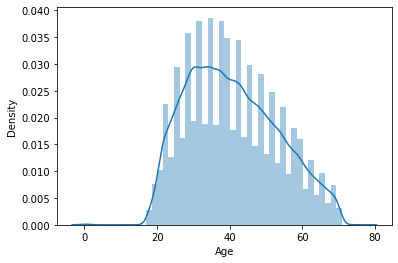

In [6]:
sns.distplot(data['Age'], kde=True)

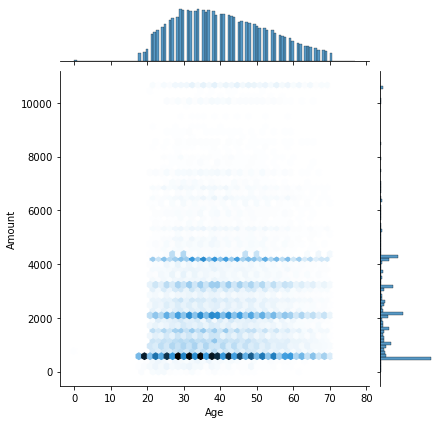

In [7]:
sns.jointplot(x='Age', y='Amount', data=data,kind='hex')

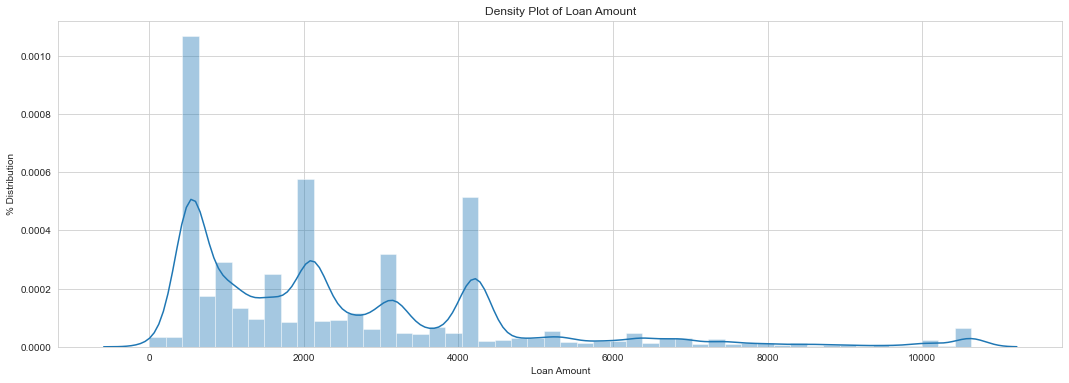

In [8]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(figsize=(18,6))

sns.distplot(data.Amount, ax=axs)

axs.set(xlabel='Loan Amount', 
       ylabel='% Distribution',title='Density Plot of Loan Amount')

plt.show()